# Get gcs_bucket type Events

In [71]:
import pandas as pd
import json
df = pd.read_json('sample_data/Case85bitsGCP_gcp-goat.jsonl', lines=True)
json_payload_df = pd.json_normalize(df['jsonPayload'])
df = pd.concat([df, json_payload_df], axis=1)
df.drop('jsonPayload', axis=1, inplace=True)
bucket_events = df[df['resource'].apply(lambda x: x.get('type') == 'gcs_bucket')]
proto_payload_df = pd.json_normalize(bucket_events['protoPayload'])
proto_payload_df.head(100)

,@type,authorizationInfo,methodName,resourceName,serviceName,authenticationInfo.principalEmail,requestMetadata.callerIp,requestMetadata.callerSuppliedUserAgent,requestMetadata.requestAttributes.time,resourceLocation.currentLocations,serviceData.@type,serviceData.policyDelta.bindingDeltas,requestMetadata.requestAttributes.reason
0,type.googleapis.com/google.cloud.audit.AuditLog,"[{'granted': True, 'permission': 'storage.objects.list', 'resource': 'projects/_/buckets/prod-blogapp-0cd284b55376bcc0', 'resourceAttributes': {}}]",storage.objects.list,projects/_/buckets/prod-blogapp-0cd284b55376bcc0,storage.googleapis.com,webmaster@hotfixed.net,198.71.53.105,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36,gzip(gfe),gzip(gfe)",2023-06-01T16:33:12.051988737Z,[us],NaN,NaN,NaN
1,type.googleapis.com/google.cloud.audit.AuditLog,"[{'granted': True, 'permission': 'storage.objects.list', 'resource': 'projects/_/buckets/prod-blogapp-0cd284b55376bcc0', 'resourceAttributes': {}}]",storage.objects.list,projects/_/buckets/prod-blogapp-0cd284b55376bcc0,storage.googleapis.com,webmaster@hotfixed.net,198.71.53.105,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36,gzip(gfe),gzip(gfe)",2023-06-01T16:33:12.051566327Z,[us],NaN,NaN,NaN
2,type.googleapis.com/google.cloud.audit.AuditLog,"[{'granted': True, 'permission': 'storage.objects.list', 'resource': 'projects/_/buckets/prod-blogapp-0cd284b55376bcc0', 'resourceAttributes': {}}]",storage.objects.list,projects/_/buckets/prod-blogapp-0cd284b55376bcc0,storage.googleapis.com,webmaster@hotfixed.net,198.71.53.105,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36,gzip(gfe),gzip(gfe)",2023-06-01T16:33:12.049346849Z,[us],NaN,NaN,NaN
3,type.googleapis.com/google.cloud.audit.AuditLog,"[{'granted': True, 'permission': 'storage.objects.list', 'resource': 'projects/_/buckets/prod-blogapp-0cd284b55376bcc0', 'resourceAttributes': {}}]",storage.objects.list,projects/_/buckets/prod-blogapp-0cd284b55376bcc0,storage.googleapis.com,webmaster@hotfixed.net,198.71.53.105,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36,gzip(gfe),gzip(gfe)",2023-06-01T16:33:12.046890835Z,[us],NaN,NaN,NaN
4,type.googleapis.com/google.cloud.audit.AuditLog,"[{'granted': True, 'permission': 'storage.objects.list', 'resource': 'projects/_/buckets/prod-blogapp-0cd284b55376bcc0', 'resourceAttributes': {}}]",storage.objects.list,projects/_/buckets/prod-blogapp-0cd284b55376bcc0,storage.googleapis.com,webmaster@hotfixed.net,198.71.53.105,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36,gzip(gfe),gzip(gfe)",2023-06-01T16:33:12.047705231Z,[us],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,type.googleapis.com/google.cloud.audit.AuditLog,"[{'granted': True, 'permission': 'serviceusage.services.use', 'resource': 'projects/000000431a3bcd43', 'resourceAttributes': {}}, {'granted': True, 'permission': 'storage.objects.delete', 'resource': 'projects/_/buckets/prod-blogapp-0cd284b55376bcc0/objects/webfiles/build/static/mock-images/covers/cover_9.jpg', 'resourceAttributes': {}}]",storage.objects.delete,projects/_/buckets/prod-blogapp-0cd284b55376bcc0/objects/webfiles/build/static/mock-images/covers/cover_9.jpg,storage.googleapis.com,webmaster@hotfixed.net,34.22.165.17,"gcloud-python/2.9.0 gl-python/3.9.2 grpc/1.54.2 gax/2.11.0 gccl/2.9.0,gzip(gfe)",2023-06-01T16:30:49.812910816Z,[us],NaN,NaN,NaN
96,type.googleapis.com/google.cloud.audit.AuditLog,"[{'granted': True, 'permission': 'serviceusage.services.use', 'resource': 'projects/000000431a3bcd43', 'resourceAttributes': {}}, {'granted': True, 'permission': 'storage.objects.delete', 'resource': 'projects/_/buckets/prod-blogapp-0cd284b55376bcc0/objects/webfiles/build/static/mock-im

# Get Unique methodNames values

In [ ]:
# Extract unique methodName values from the filtered events
bucket_methods = bucket_events['protoPayload'].apply(lambda x: x.get('methodName') if isinstance(x, dict) else None).unique()

# Print the available methods
print("Available methods for gcs_bucket:", bucket_methods)
# Get user input
selected_method = input("Enter the methodName to filter: ")

# Filter by methodName
# Added a check to make sure x is a dictionary before calling get
if selected_method:
    # Generate the boolean mask correctly, apply method is not needed here.
    mask = bucket_events['protoPayload'].apply(lambda x: isinstance(x, dict) and x.get('methodName') == selected_method)
    # Use the boolean mask to select rows from the dataframe, use .loc to filter rows
    filtered_events = bucket_events.loc[mask]
else:
    filtered_events = bucket_events

# Display the filtered events
print(filtered_events)

Available methods for gcs_bucket: ['storage.objects.list' 'storage.objects.create' 'storage.objects.delete'
 'storage.objects.get']
Enter the methodName to filter: storage.objects.get
             insertId labels  \
54453    mhghzge4o88i    NaN   
54456   1cuavsxe4m4nl    NaN   
54501   10woet8e4q2o9    NaN   
54550    14fdrve80x54    NaN   
54555    rh3ugxeclh4v    NaN   
54567   1thk7u3e2x6d4    NaN   
54571    jzevzuegq4cj    NaN   
54574   1xdeikze9hw5q    NaN   
54577   12kw0e9edqosv    NaN   
54590   1s3t1z6ehbkk4    NaN   
54810   102naiye71ys1    NaN   
54816   17kqteee15sj9    NaN   
54827    wh615ned6x2c    NaN   
54829    n1ayw8ec3huf    NaN   
54831   1ubp5ulekxkib    NaN   
55020    by3oksel4j48    NaN   
55023   1uvp6usedhbj2    NaN   
55028    cronewedhl95    NaN   
55039   1ultziuelm9ig    NaN   
55220   1pm1u8heazu7y    NaN   
55223   10n39kdem96m2    NaN   
58092    by3oksel21kq    NaN   
58114    oph8hfe4gerg    NaN   
75590   1j8cghxe1p3b8    NaN   
75852    x133bce

# Get the data in Columns for better visualitation

In [ ]:
# Extract unique methodName values from the filtered events
bucket_methods = bucket_events['protoPayload'].apply(lambda x: x.get('methodName') if isinstance(x, dict) else None).unique()

# Print the available methods
print("Available methods for gcs_bucket:", bucket_methods)
# Get user input
selected_method = input("Enter the methodName to filter: ")

# Filter by methodName
# Added a check to make sure x is a dictionary before calling get
if selected_method:
    # Generate the boolean mask correctly, apply method is not needed here.
    mask = bucket_events['protoPayload'].apply(lambda x: isinstance(x, dict) and x.get('methodName') == selected_method)
    # Use the boolean mask to select rows from the dataframe, use .loc to filter rows
    filtered_events = bucket_events.loc[mask]
else:
    filtered_events = bucket_events

# Normalize the 'resource' column
resource_df = pd.json_normalize(bucket_events['resource'])
# Concatenate the normalized resource data to the bucket_events dataframe
bucket_events = pd.concat([bucket_events.reset_index(drop=True), resource_df.reset_index(drop=True)], axis=1)

relevant_data = bucket_events[['timestamp', 'labels.bucket_name']]

# Extract nested data from protoPayload
proto_payload_df = pd.json_normalize(bucket_events['protoPayload'])
relevant_data = pd.concat([relevant_data, proto_payload_df[['authenticationInfo.principalEmail', 'requestMetadata.callerIp', 'requestMetadata.callerSuppliedUserAgent', 'resourceName']]], axis=1)

# Rename columns for clarity
relevant_data = relevant_data.rename(columns={
    'labels.bucket_name': 'bucket_name',
    'authenticationInfo.principalEmail': 'principalEmail',
    'requestMetadata.callerIp': 'callerIp',
    'requestMetadata.callerSuppliedUserAgent': 'callerSuppliedUserAgent'
})

# Print the relevant data
print(relevant_data)

Available methods for gcs_bucket: ['storage.objects.list' 'storage.objects.create' 'storage.objects.delete'
 'storage.objects.get']
Enter the methodName to filter: storage.objects.create
                               timestamp                    bucket_name  \
0    2023-06-01 16:33:12.046854377+00:00  prod-blogapp-0cd284b55376bcc0   
1    2023-06-01 16:33:12.046197210+00:00  prod-blogapp-0cd284b55376bcc0   
2    2023-06-01 16:33:12.042597765+00:00  prod-blogapp-0cd284b55376bcc0   
3    2023-06-01 16:33:12.042324805+00:00  prod-blogapp-0cd284b55376bcc0   
4    2023-06-01 16:33:12.042263379+00:00  prod-blogapp-0cd284b55376bcc0   
...                                  ...                            ...   
1417 2023-05-31 07:33:48.783132499+00:00  prod-blogapp-0cd284b55376bcc0   
1418 2023-05-31 07:33:47.771559349+00:00  prod-blogapp-0cd284b55376bcc0   
1419 2023-05-31 07:33:47.354592409+00:00  prod-blogapp-0cd284b55376bcc0   
1420 2023-05-31 07:27:46.396339784+00:00  prod-blogapp-0cd284b5

# The visualization is still shite, let's fix it

In [ ]:
from tabulate import tabulate
print(tabulate(relevant_data, headers='keys', tablefmt='grid'))

+------+-------------------------------------+----------------------------------------------------+--------------------------------------------------------------+----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      | timestamp                           | bucket_name                                        | principalEmail                                               | callerIp       | callerSuppliedUserAgent                                                                                                                                         

## Not good enough!

In [ ]:
from ipywidgets import Output, HTML
import ipywidgets as widgets

relevant_df = pd.DataFrame(relevant_data)

# Create an Output widget
out = Output()

# Display the DataFrame as an HTML table within the Output widget
with out:
    display(HTML(relevant_df.to_html()))

# Display the Output widget
display(out)

Output()

# Let's add some visualizations

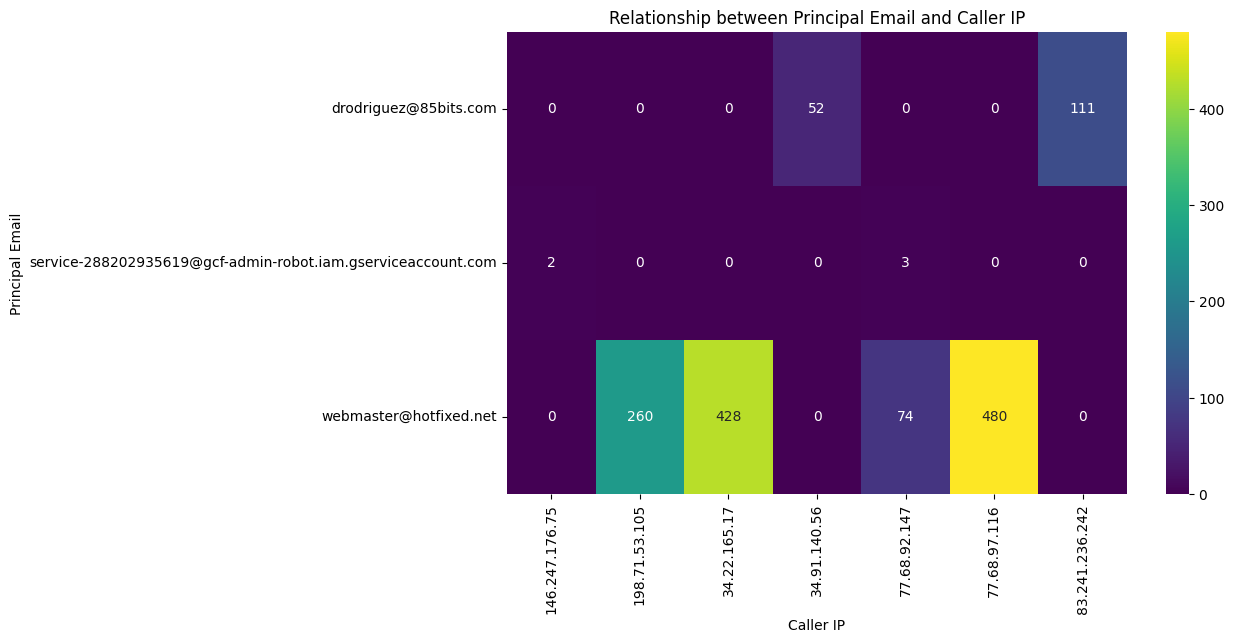

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code to filter and extract relevant data)

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(relevant_data['principalEmail'], relevant_data['callerIp'])

# Create a heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.xlabel("Caller IP")
plt.ylabel("Principal Email")
plt.title("Relationship between Principal Email and Caller IP")
plt.show()

In [ ]:
!pip install plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd

# ... (your existing code to filter and extract relevant data)

# Create a list of unique emails and IPs
emails = relevant_data['principalEmail'].unique().tolist()
ips = relevant_data['callerIp'].unique().tolist()

# Create a matrix of connection counts
matrix = contingency_table.values.tolist()

# Create the chord diagram
fig = go.Figure(data=[go.Chord(
    matrix=matrix,
    node_ids=emails + ips,
    node_colors=['lightblue'] * len(emails) + ['lightgreen'] * len(ips),  # Customize colors
)])
fig.update_layout(title="Relationship between Principal Email and Caller IP")
fig.show()

AttributeError: module 'plotly.graph_objects' has no attribute 'Chord'